# Plots for report

This notebook tries to find if there are similarities in shopper behaviour using network analysis.

## Load dependencies

In [ ]:
!pip install -e .

In [ ]:
!pip install tqdm
!pip install imageio

In [1]:
import pandas as pd
import numpy as np
import copy

from scipy import stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from msci.utils import utils
from msci.utils.utils import data_path
from msci.analysis.networks import *
from msci.utils.plot import create_count_of_shoppers_gif, create_count_of_shoppers_image
from msci.utils.plot import plot_path_jn, plot_histogram_jn, plot_points_on_map_jn
from msci.analysis.markov_chain import *

In [4]:
from sklearn import preprocessing
from scipy.stats import linregress

## Plots needed

Data preparation
 - mall of mauritius (✔️)
 - triangulation
 - dataset example
 - speed of the devices (✔️)
 - dbscan diagram
 - dbscan radius of gyration against length of stay (✔️)
 - sequential bayes
 - bayesian radius of gyration against length of stay (✔️)
 - number of devices in the mall against time (✔️)
 
Complexity Analysis
 - Levy walk example
 - path length distribution (one mall + all)
 - (satter plot of the mall)
 - nmber of people in a shop against area (✔️)

Agent-based model
 - number of shoppers entering over the day
 - number of shoppers against the length of stay
 - number of people in a shop against area (base case)
 - number of people in a shop against area (markov chain)
 
Community detection
 - modularity network
 - hausdorff distance example
 - hausdorff distance shoppers example
 - keywords tripartite network
 - keywords probabiliy against degree

## Get data

In [5]:
mac_address_df = utils.import_mac_addresses(version=4)
signal_df = utils.import_signals(version=4)

c:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
shopper_df = mac_address_df[
    (mac_address_df.dbscan_label == 'Shopper') |
    (mac_address_df.dbscan_label == 'Stationary') |
    (mac_address_df.dbscan_label == 'Mall Worker')
]

In [7]:
mac_address_df.dbscan_label.value_counts()

Not Classified    144626
Shopper             8928
Mall Worker          156
Stationary           143
Name: dbscan_label, dtype: int64

## Plots

### Data Preparation

In [8]:
csfont = {'fontname':'Times New Roman'}
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Times New Roman',style='normal', size=30)

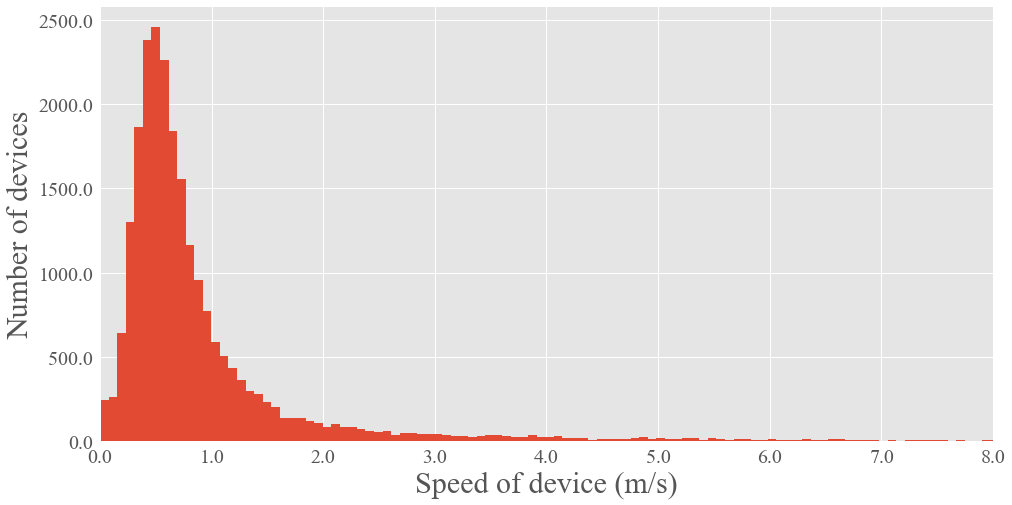

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

devices_df = mac_address_df[
    (mac_address_df.frequency > 10)
]

devices_df.av_speed.hist(bins=300, ax=ax)
ax.set_ylabel('Number of devices', fontsize=30, **csfont)
ax.set_xlabel('Speed of device (m/s)', fontsize=30, **csfont)
ax.set_xlim(left=0, right=8)
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks(), csfont);

#fig.savefig('dbscan_clustering_example.png', dpi=400)

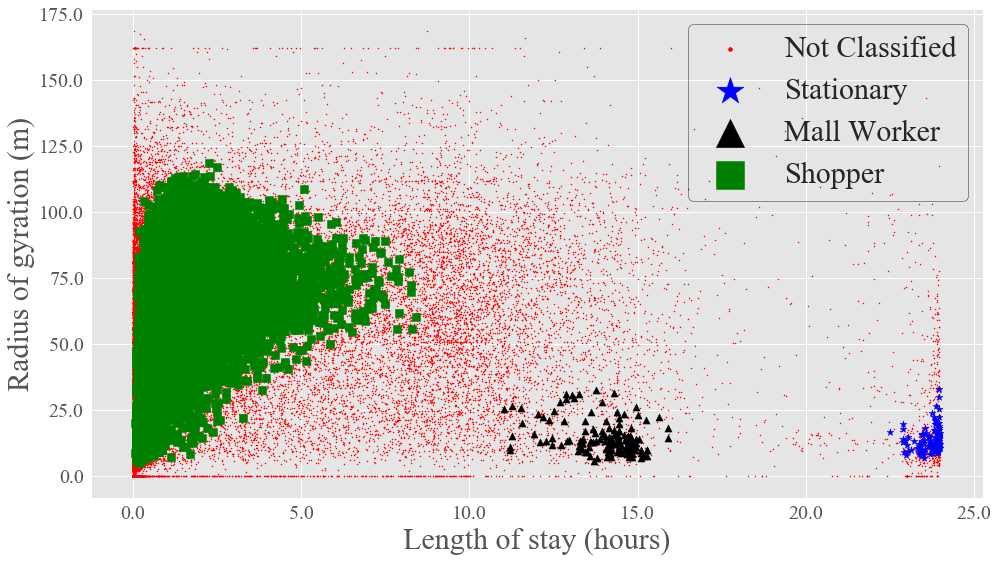

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

labels = mac_address_df.dbscan_label.unique()
output_label_group = mac_address_df.groupby('dbscan_label')

colours = ['r', 'b', 'k', 'g']
markers = [',', '*', '^', 's']

i = 0
for label in labels:
    label_group = output_label_group.get_group(label)
    x = label_group.length_of_stay.as_matrix()
    y = label_group.radius_of_gyration.as_matrix()
    if label == 'Not Classified':
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=1)
    else:
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=50, marker=markers[i])
    i += 1
    
ax.set_xlabel('Length of stay (hours)', fontsize=30, **csfont)
ax.set_ylabel('Radius of gyration (m)', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks(), csfont);

fig.savefig('dbscan_clustering_example.png', dpi=400, transparent=True)

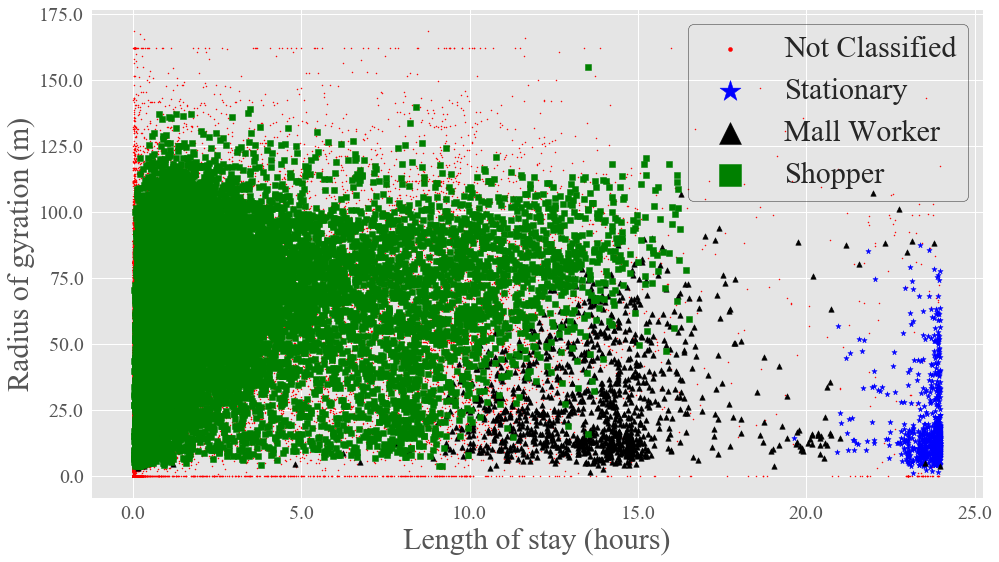

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

labels = mac_address_df.dbscan_label.unique()
output_label_group = mac_address_df.groupby('bayesian_label')

colours = ['r', 'b', 'k', 'g']
markers = [',', '*', '^', 's']

i = 0
for label in labels:
    label_group = output_label_group.get_group(label)
    x = label_group.length_of_stay.as_matrix()
    y = label_group.radius_of_gyration.as_matrix()
    if label == 'Not Classified':
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=1)
    else:
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=30, marker=markers[i])
    i += 1
    
ax.set_xlabel('Length of stay (hours)', fontsize=30, **csfont)
ax.set_ylabel('Radius of gyration (m)', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks(), csfont);

#fig.savefig('dbscan_clustering_example.png', dpi=400, transparent=True)

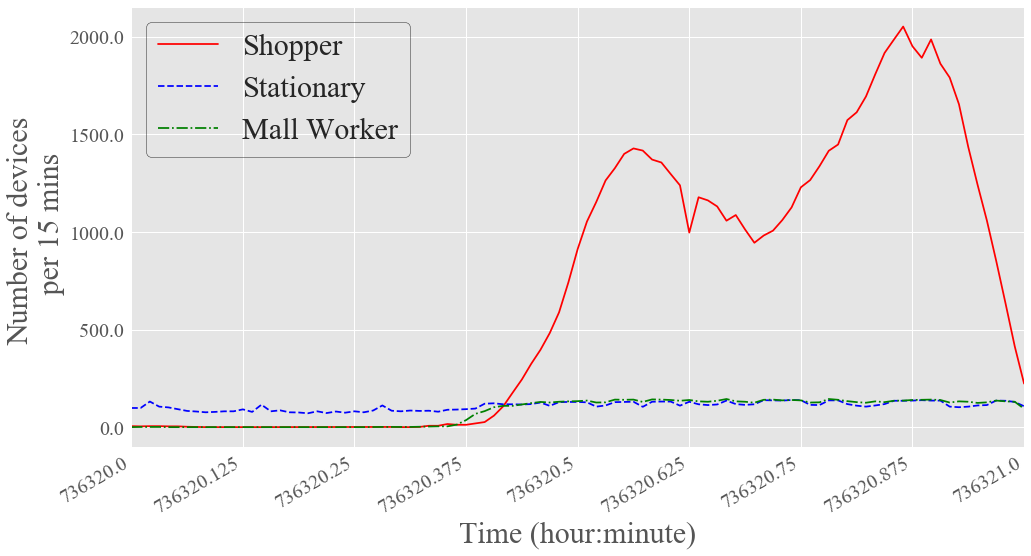

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

macs = mac_address_df[mac_address_df.dbscan_label == 'Shopper'].mac_address.tolist()

plot_histogram_jn(
    signal_df[signal_df.mac_address.isin(macs)], 
    axes=ax,
    label='Shopper',
    style='r-'
);

macs = mac_address_df[mac_address_df.dbscan_label == 'Stationary'].mac_address.tolist()

plot_histogram_jn(
    signal_df[signal_df.mac_address.isin(macs)], 
    axes=ax,
    label='Stationary',
    style='b--'
);

macs = mac_address_df[mac_address_df.dbscan_label == 'Mall Worker'].mac_address.tolist()

plot_histogram_jn(
    signal_df[signal_df.mac_address.isin(macs)], 
    axes=ax,
    label='Mall Worker',
    style='g-.'
);


import matplotlib.dates as dates
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

ax.legend(prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.set_ylabel('Number of devices \n per 15 mins', fontsize=30, **csfont)
ax.set_xlabel('Time (hour:minute)', fontsize=30, **csfont)
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks(), csfont);

# fig.savefig('mac_addresses_15_mins.png', dpi=400, transparent=True)

### Complexity Analysis

In [19]:
shop_df_old = utils.import_shop_directory(mall='Mall of Mauritius', version=2)
shop_df1 = utils.import_shop_directory(mall='Mall of Mauritius', version=1)

shop_df = pd.merge(
    shop_df_old, 
    shop_df1[['store_id', 'store_name', 'store_category']], 
    how='left',
    on='store_id'
)

In [20]:
area_shop_df = shop_df[(shop_df.area > 10) & (shop_df.count_of_shoppers > 400)]

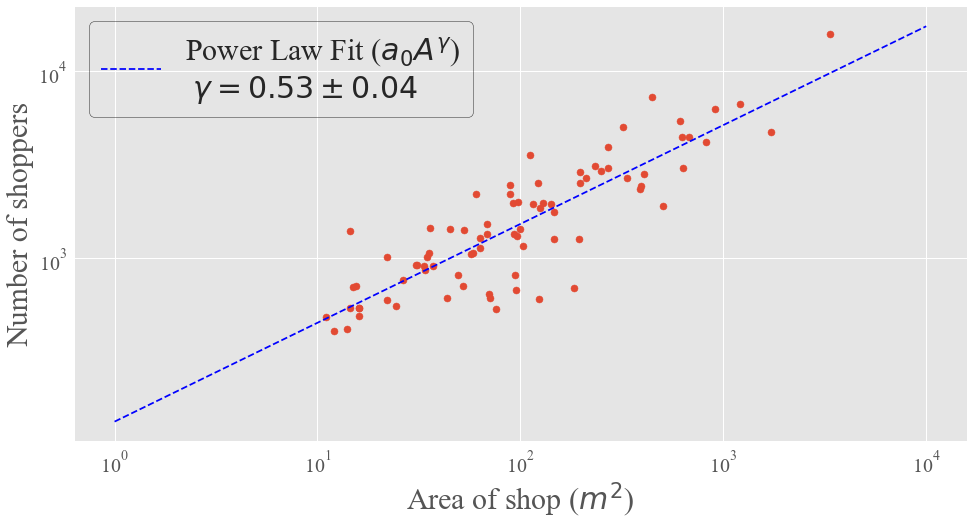

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

x = area_shop_df.area.tolist()
y = area_shop_df.count_of_shoppers # / sum(area_shop_df.count_of_shoppers)).tolist()

ax.scatter(x, y, label=None)

slope, intercept, x_value, p_value, std_err = linregress(np.log10(x), np.log10(y))
x_fit = np.linspace(10**(0), 10**(4), 10)
y_fit = [10**intercept*x**slope for x in x_fit]
ax.plot(
    x_fit, y_fit, 
    'b--', 
    label='Power Law Fit ($a_0A^{\gamma}$) \n $\gamma=%.2f \pm %.2f$' % (slope, std_err)
)

ax.set_xlabel('Area of shop ($m^2$)', fontsize=30, **csfont)
ax.set_ylabel('Number of shoppers', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks(), csfont)
ax.set_xscale('log')
ax.set_yscale('log')

# fig.savefig('mac_addresses_15_mins.png', dpi=400, transparent=True)